In [69]:
from scipy.stats import stats
import statistics
import pandas as pd
import numpy as np
import pingouin as pg

In [2]:
# anova на примере датасета с генотерапией
URL = 'https://stepik.org/media/attachments/lesson/8083/genetherapy.csv'
data = pd.read_csv(URL)

In [3]:
data.head()

,expr,Therapy
0,100,A
1,96,A
2,101,A
3,95,A
4,103,A


In [4]:
data.shape

(60, 2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   expr     60 non-null     int64 
 1   Therapy  60 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


<AxesSubplot:title={'center':'expr'}, xlabel='Therapy'>

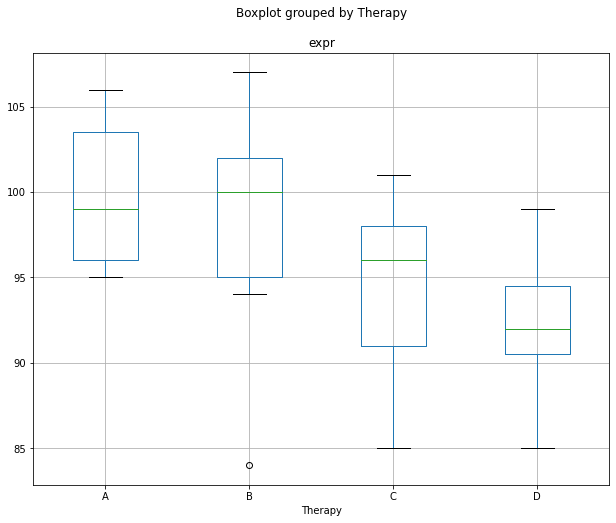

In [6]:
data.boxplot('expr', by='Therapy', figsize=(10,8), grid=True)

In [7]:
A = data[data["Therapy"] == "A"]["expr"]
B = data[data["Therapy"] == "B"]["expr"]
C = data[data["Therapy"] == "C"]["expr"]
D = data[data["Therapy"] == "D"]["expr"]

In [8]:
A = data[data["Therapy"] == "A"]["expr"]
A_Mx = sum(A)/len(A)
A_SD = statistics.stdev(A)
print('Среднее по группе А:',"%.2f" %  A_Mx)
print('Стандартное отклонение по группе А:',"%.2f" %  A_SD)

Среднее по группе А: 99.73
Стандартное отклонение по группе А: 4.17


In [9]:
B = data[data["Therapy"] == "B"]["expr"]
B_Mx = sum(B)/len(B)
B_SD = statistics.stdev(B)
print('Среднее по группе B:',"%.2f" %  B_Mx)
print('Стандартное отклонение по группе B:',"%.2f" % B_SD)

Среднее по группе B: 98.80
Стандартное отклонение по группе B: 5.89


In [10]:
C = data[data["Therapy"] == "C"]["expr"]
C_Mx = sum(C)/len(C)
C_SD = statistics.stdev(C)
print('Среднее по группе C:',"%.2f" %  C_Mx)
print('Стандартное отклонение по группе C:',"%.2f" % C_SD)

Среднее по группе C: 94.40
Стандартное отклонение по группе C: 5.19


In [11]:
D = data[data["Therapy"] == "D"]["expr"]
D_Mx = sum(D)/len(D)
D_SD = statistics.stdev(D)
print('Среднее по группе D:',"%.2f" %  D_Mx)
print('Стандартное отклонение по группе D:',"%.2f" % D_SD)

Среднее по группе D: 92.33
Стандартное отклонение по группе D: 3.74


In [12]:
X0= data["expr"]
X0=data['expr'].sum()/60
X0

96.31666666666666

In [13]:
SSB= (15*(A_Mx-X0)**2)+(15*(B_Mx-X0)**2)+(15*(C_Mx-X0)**2)+(15*(D_Mx-X0)**2)
#СРЕДНЕЕ МЕЖДУ ГРУПП
SSB

560.7166666666667

In [54]:
# SSW можно расчитать как квадрат дисперсии по каждой группе умноженный на количество эламентов в групппе минус 1.
#В нашем случае это 15 элементов в каждой группе минус 1 равно 14.
DA = (A_SD**2)+(B_SD**2)+(C_SD**2)+(D_SD**2)
print('DA', DA)
SSW = DA*14
print('SSW', SSW)

DA 93.01904761904761
SSW 1302.2666666666667


In [52]:
F=(SSB/3)/(SSW/56)
F

8.037302481143989

In [55]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [57]:
# anova в 4 строки
stat_data = data.groupby("Therapy").agg(["count", "mean","std"])
stat_data.columns=["N","Mx","SD"]
stat_data

,N,Mx,SD
Therapy,,,
A,15,99.73333,4.16562
B,15,98.80000,5.89431
C,15,94.40000,5.19340
D,15,92.33333,3.73529


In [68]:
pg.anova(data=data, dv = 'expr',between ='Therapy',detailed=True )

,Source,SS,DF,MS,F,p-unc,np2
0,Therapy,560.71667,3,186.90556,8.03730,0.00015,0.30098
1,Within,1302.26667,56,23.25476,NaN,NaN,NaN
